<a href="https://colab.research.google.com/github/Mathindata/SQL_Sandbox/blob/master/Stitch%20Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

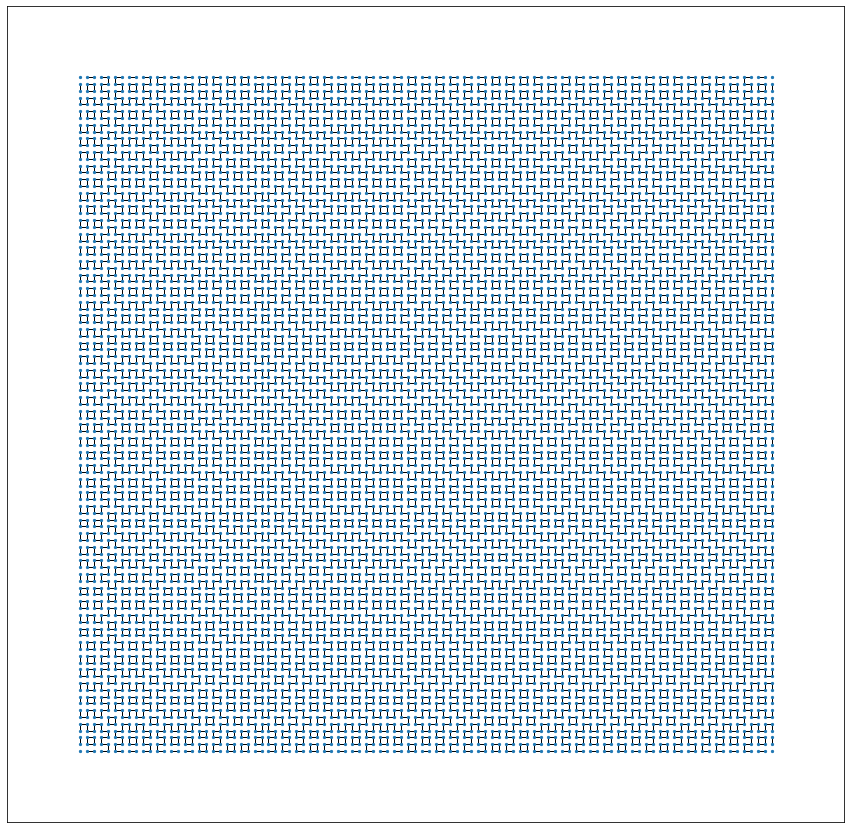

In [2]:
from sympy import sieve, prime, isprime
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

N=100
H=nx.grid_2d_graph(N,N)
Edges = list(H.edges)

pos = dict( (n, n) for n in H.nodes() ) #Dictionary of all positions

labels = dict( ((i, j), i + (N-1-j) * N ) for i, j in H.nodes() )
#nx.draw_networkx(H, pos=pos, labels=labels,with_labels=False, node_size=10)

[H.remove_edge(I,J) for (I,J) in Edges]

######################################################### 

a1 = [1+4*n for n in range(N)] # Arithmetic progression 2+3n < 20
a2 = [3+4*n for n in range(N)] # Arithmetic progression 2+3n < 20

#print([isprime(a) for a in a1])

#[H.add_edge(I,J) for (I,J) in Edges if isprime((sum(list(I)) + (sum(list(J)))))]

#Ax1 = np.random.randint(0,2,(N,))
#Ax2 = np.random.randint(0,2,(N,))
Ax1 = [isprime(a) for a in a1]
Ax2 = [isprime(a) for a in a2] 

#####################################################################

# Add Stitches based on Ax1, Horizentally
for ii in range(len(Ax1)):
  [H.add_edge(I,J) for (I,J) in Edges if (((-1)**((sum(I)))== -(-1)**(Ax1[ii]) ) 
  and (I[1] == ii) and (J[1] == ii))] 

# Add Stitches based on Ax2, Vertically
for ii in range(len(Ax2)):
  [H.add_edge(I,J) for (I,J) in Edges if (((-1)**((sum(I)))== -(-1)**(Ax1[ii]) ) 
  and (I[0] == ii) and (J[0] == ii))]


fig = plt.figure(1, figsize=(15, 15))#, dpi=60)

nx.draw_networkx(H, pos=pos,with_labels=False, node_size=5)#, labels=labels